#### Загрузка и подготовка данных для анализа

Cardiovascular Disease dataset https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("data/cardio_train.csv", sep=";", index_col="id")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


#### Описание признаков

1. age -- возраст в днях;
2. gender -- пол (1 - ж, 2 - м);
3. height -- рост в см.;
4. weight -- вес в кг.;
5. ap-hi -- систолическое давление в мм рт. ст.;
6. ap_lo -- диастолическое давление в мм рт. ст.;
7. cholesterol -- холестерин в крови (1 - в норме, 2 - выше нормы, 3 - сильно выше нормы);
8. gluc -- сахар в крови (1 - в норме, 2 - выше нормы, 3 - сильно выше нормы);
9. smoke -- курит (0 - нет, 1 - да);
10. alco -- употребляет алкоголь (0 - нет, 1 - да);
11. active -- ведет активный образ жизни (0 - нет, 1 - да);
12. cardio -- риск ССЗ (целевой признак) (0 - нет, 1 - да).


#### Отображение набора данных

In [24]:
df

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
99993  19240       2     168    76.0    120     80            1     1      1   
99995  22601       1     158   126.0    140     90            2     2      0   
99996  19066       2     183   105.0    180     90            3     1      0   
99998  22431       1     163    72.0    135     80            1     2      0   
99999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
id                           
0         0       1       0  
1         0       1       1  
2         0       0       1  
3         0       1       1  
4         0       0       0  
...     ...     ...     ...  
99993     0       1       0  
99995     0       1       1  
99996     1       0       1  
99998     0       0       1  
99999     0       1       0  

[70000 rows x 12 columns]

In [25]:
df.describe().T

count          mean          std      min      25%      50%  \
age          70000.0  19468.865814  2467.251667  10798.0  17664.0  19703.0   
gender       70000.0      1.349571     0.476838      1.0      1.0      1.0   
height       70000.0    164.359229     8.210126     55.0    159.0    165.0   
weight       70000.0     74.205690    14.395757     10.0     65.0     72.0   
ap_hi        70000.0    128.817286   154.011419   -150.0    120.0    120.0   
ap_lo        70000.0     96.630414   188.472530    -70.0     80.0     80.0   
cholesterol  70000.0      1.366871     0.680250      1.0      1.0      1.0   
gluc         70000.0      1.226457     0.572270      1.0      1.0      1.0   
smoke        70000.0      0.088129     0.283484      0.0      0.0      0.0   
alco         70000.0      0.053771     0.225568      0.0      0.0      0.0   
active       70000.0      0.803729     0.397179      0.0      1.0      1.0   
cardio       70000.0      0.499700     0.500003      0.0      0.0      0.0   

                 75%      max  
age          21327.0  23713.0  
gender           2.0      2.0  
height         170.0    250.0  
weight          82.0    200.0  
ap_hi          140.0  16020.0  
ap_lo           90.0  11000.0  
cholesterol      2.0      3.0  
gluc             1.0      3.0  
smoke            0.0      1.0  
alco             0.0      1.0  
active           1.0      1.0  
cardio           1.0      1.0

Преобразование возраста из дней в годы

In [2]:
df["age"] = df["age"] / 365.24
df.describe().T

count        mean         std         min        25%  \
age          70000.0   53.304309    6.755152   29.564122   48.36272   
gender       70000.0    1.349571    0.476838    1.000000    1.00000   
height       70000.0  164.359229    8.210126   55.000000  159.00000   
weight       70000.0   74.205690   14.395757   10.000000   65.00000   
ap_hi        70000.0  128.817286  154.011419 -150.000000  120.00000   
ap_lo        70000.0   96.630414  188.472530  -70.000000   80.00000   
cholesterol  70000.0    1.366871    0.680250    1.000000    1.00000   
gluc         70000.0    1.226457    0.572270    1.000000    1.00000   
smoke        70000.0    0.088129    0.283484    0.000000    0.00000   
alco         70000.0    0.053771    0.225568    0.000000    0.00000   
active       70000.0    0.803729    0.397179    0.000000    1.00000   
cardio       70000.0    0.499700    0.500003    0.000000    0.00000   

                    50%         75%           max  
age           53.945351   58.391742     64.924433  
gender         1.000000    2.000000      2.000000  
height       165.000000  170.000000    250.000000  
weight        72.000000   82.000000    200.000000  
ap_hi        120.000000  140.000000  16020.000000  
ap_lo         80.000000   90.000000  11000.000000  
cholesterol    1.000000    2.000000      3.000000  
gluc           1.000000    1.000000      3.000000  
smoke          0.000000    0.000000      1.000000  
alco           0.000000    0.000000      1.000000  
active         1.000000    1.000000      1.000000  
cardio         0.000000    1.000000      1.000000

Минимальный возраст -- 29.5 лет, максимальный возраст -- 64.9 года.

Минимальный рост -- 55 см, максимальный рост -- 250 см.

Минимальный вес -- 10 кг, максимальный вес -- 200 кг.

Минимальное систолическое давление -- -150 мм рт ст, максимальное систолическое давление -- 16020 мм рт ст.

Минимальное диастолическое давление --  -70 мм рт ст, максимальное диастолическое давление -- 11000 мм рт ст.

Необходима очистка данных от ошибочных значений.

#### Визуализация признаков попарно для определения корреляции между ними

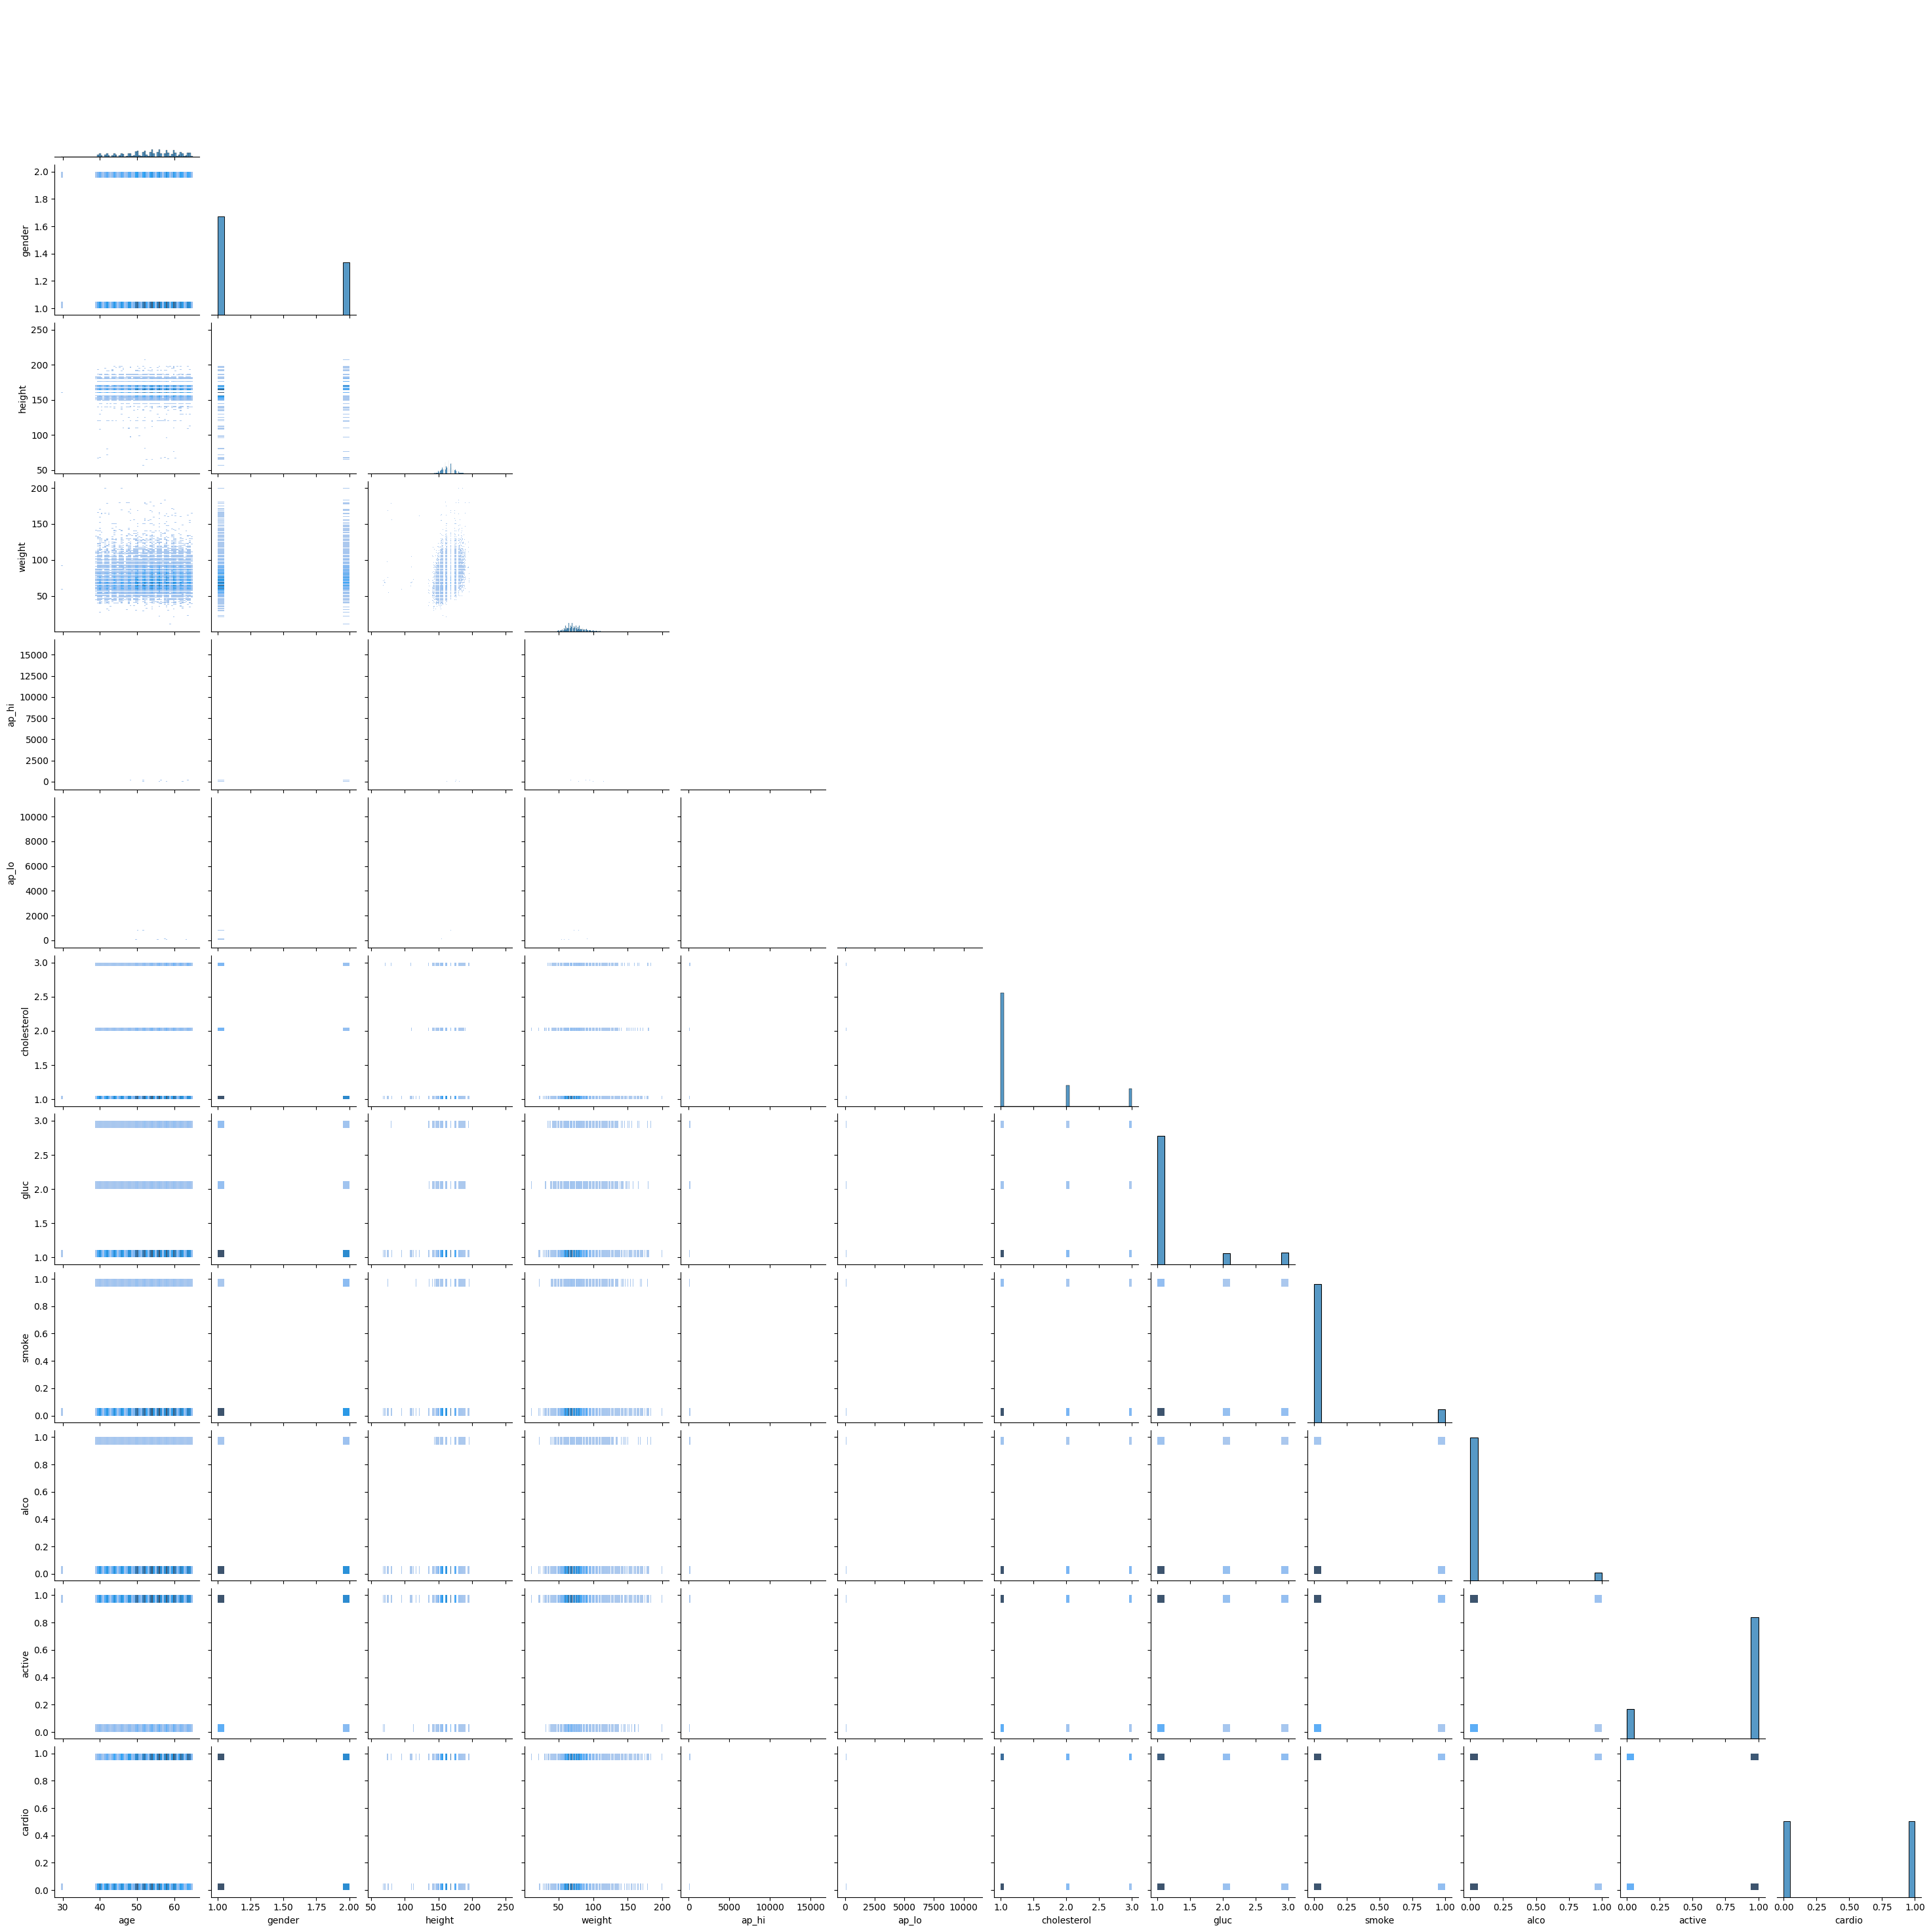

In [ ]:
sns.pairplot(df, corner=True, kind="hist")

#### Визуализация распределения значений признаков

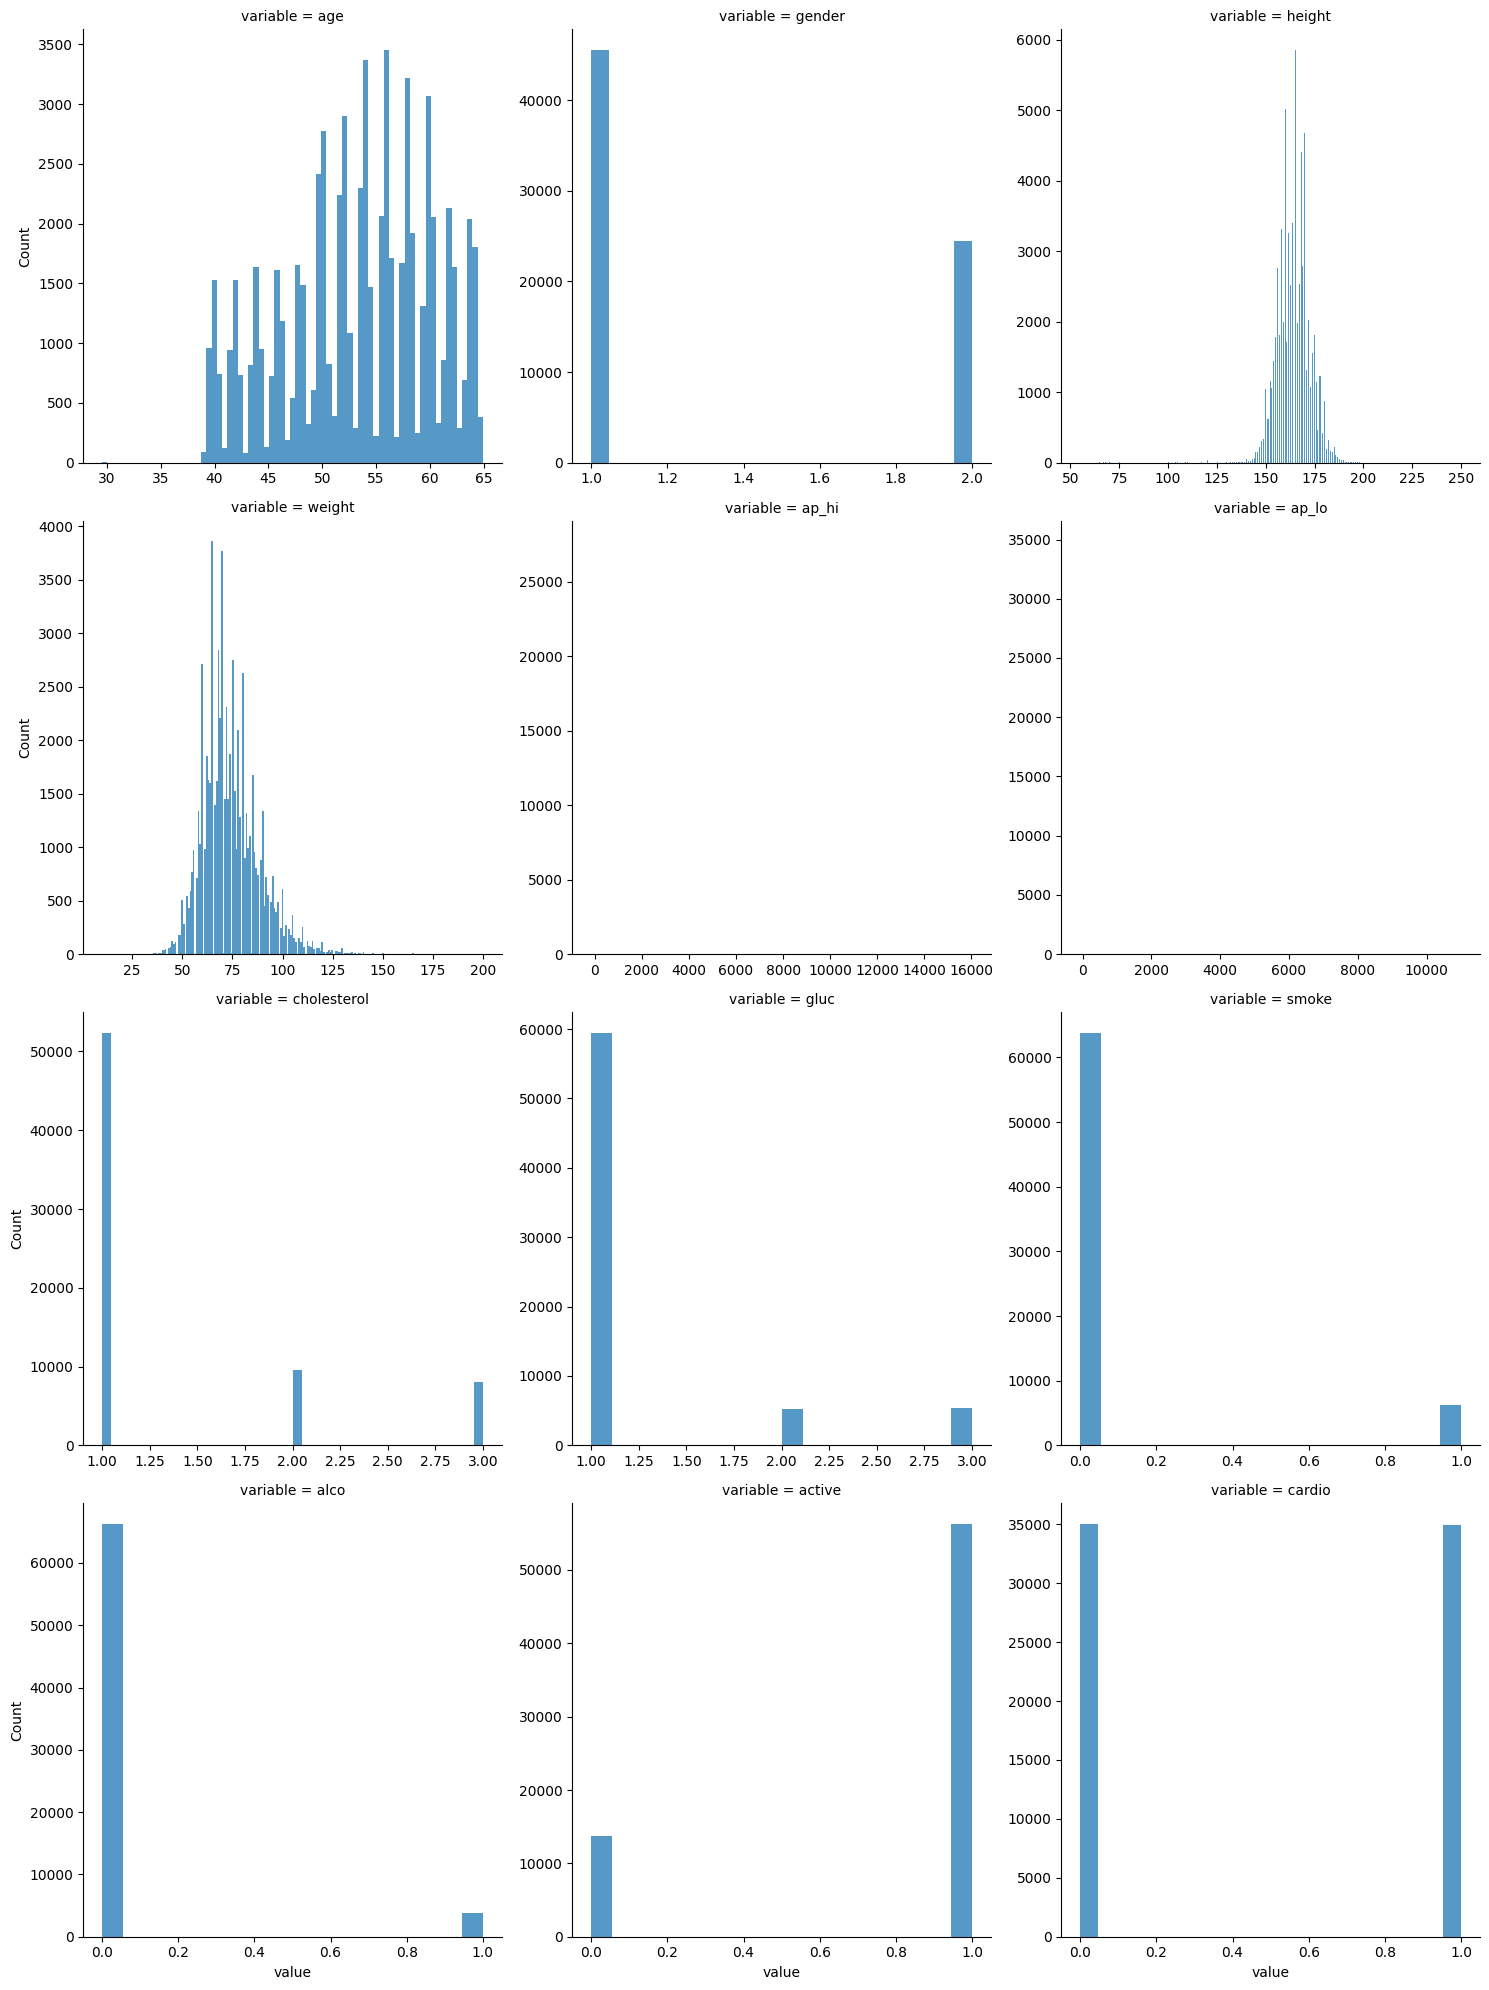

In [ ]:
sns.displot(
    x="value",
    data=df.melt(value_vars=df.columns), # type: ignore
    col="variable",
    kind="hist",
    col_wrap=3,
    facet_kws={"sharex": False, "sharey": False},
    common_bins=False,
)

#### Визуализация выбросов в данных

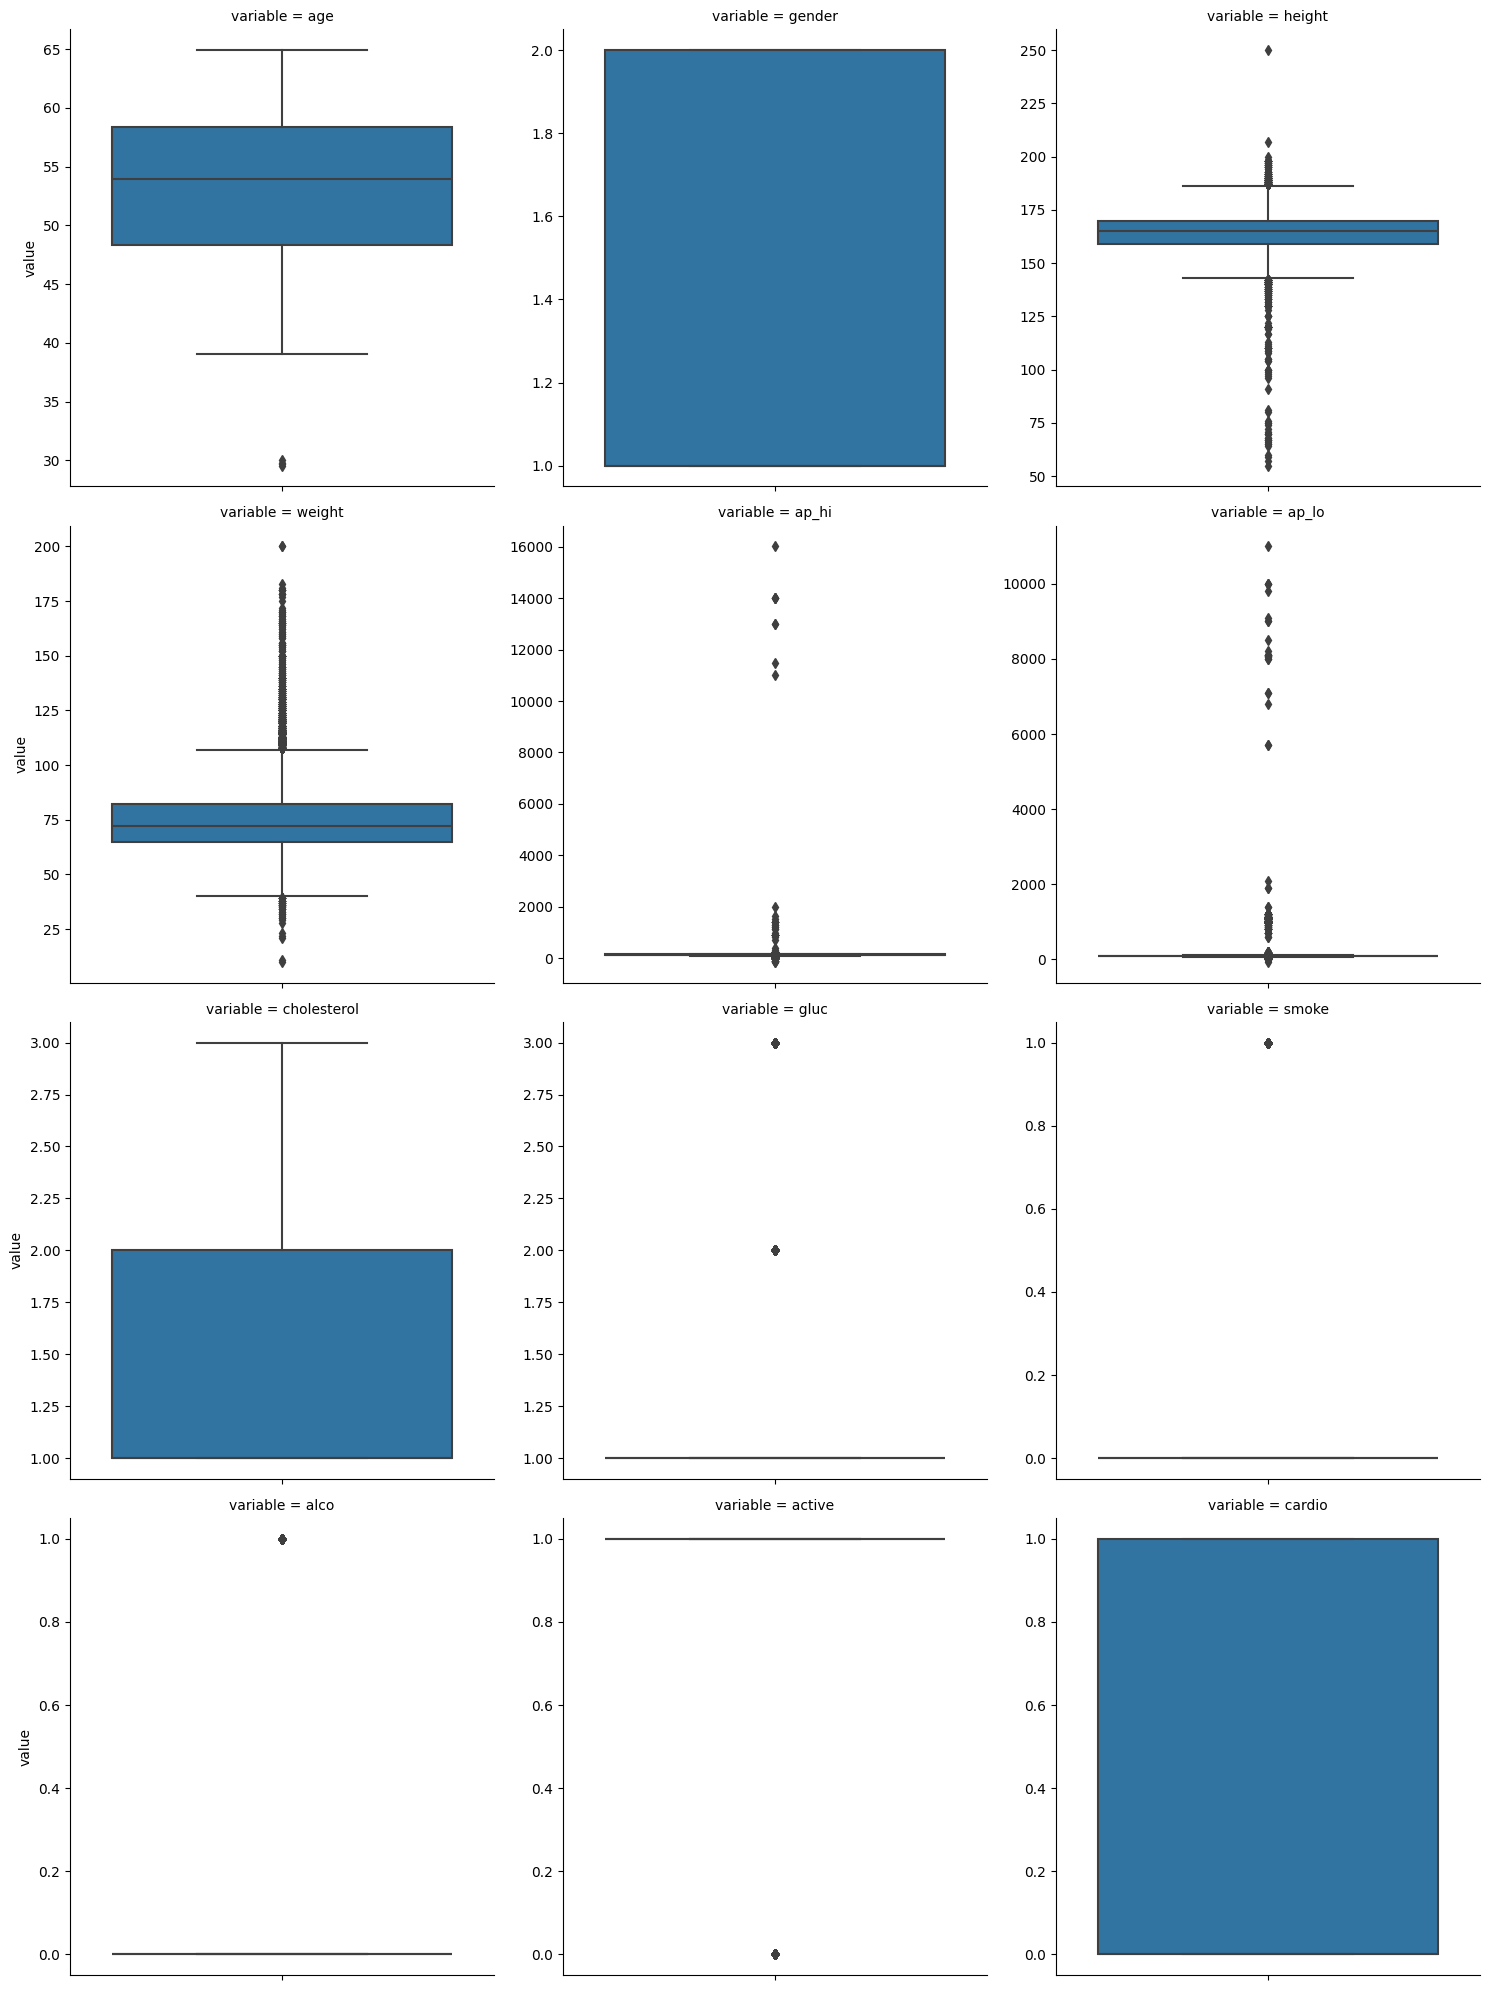

In [ ]:
sns.catplot(
    y="value",
    data=df.melt(value_vars=df.columns), # type: ignore
    col="variable",
    kind="box",
    col_wrap=3,
    sharey=False,
)

Большое количество выбросов в значениях давления, значения роста и веса также требуют некоторой корректировки

#### Визуализация зависимости значения целевого признака от значения каждого из входных признаков

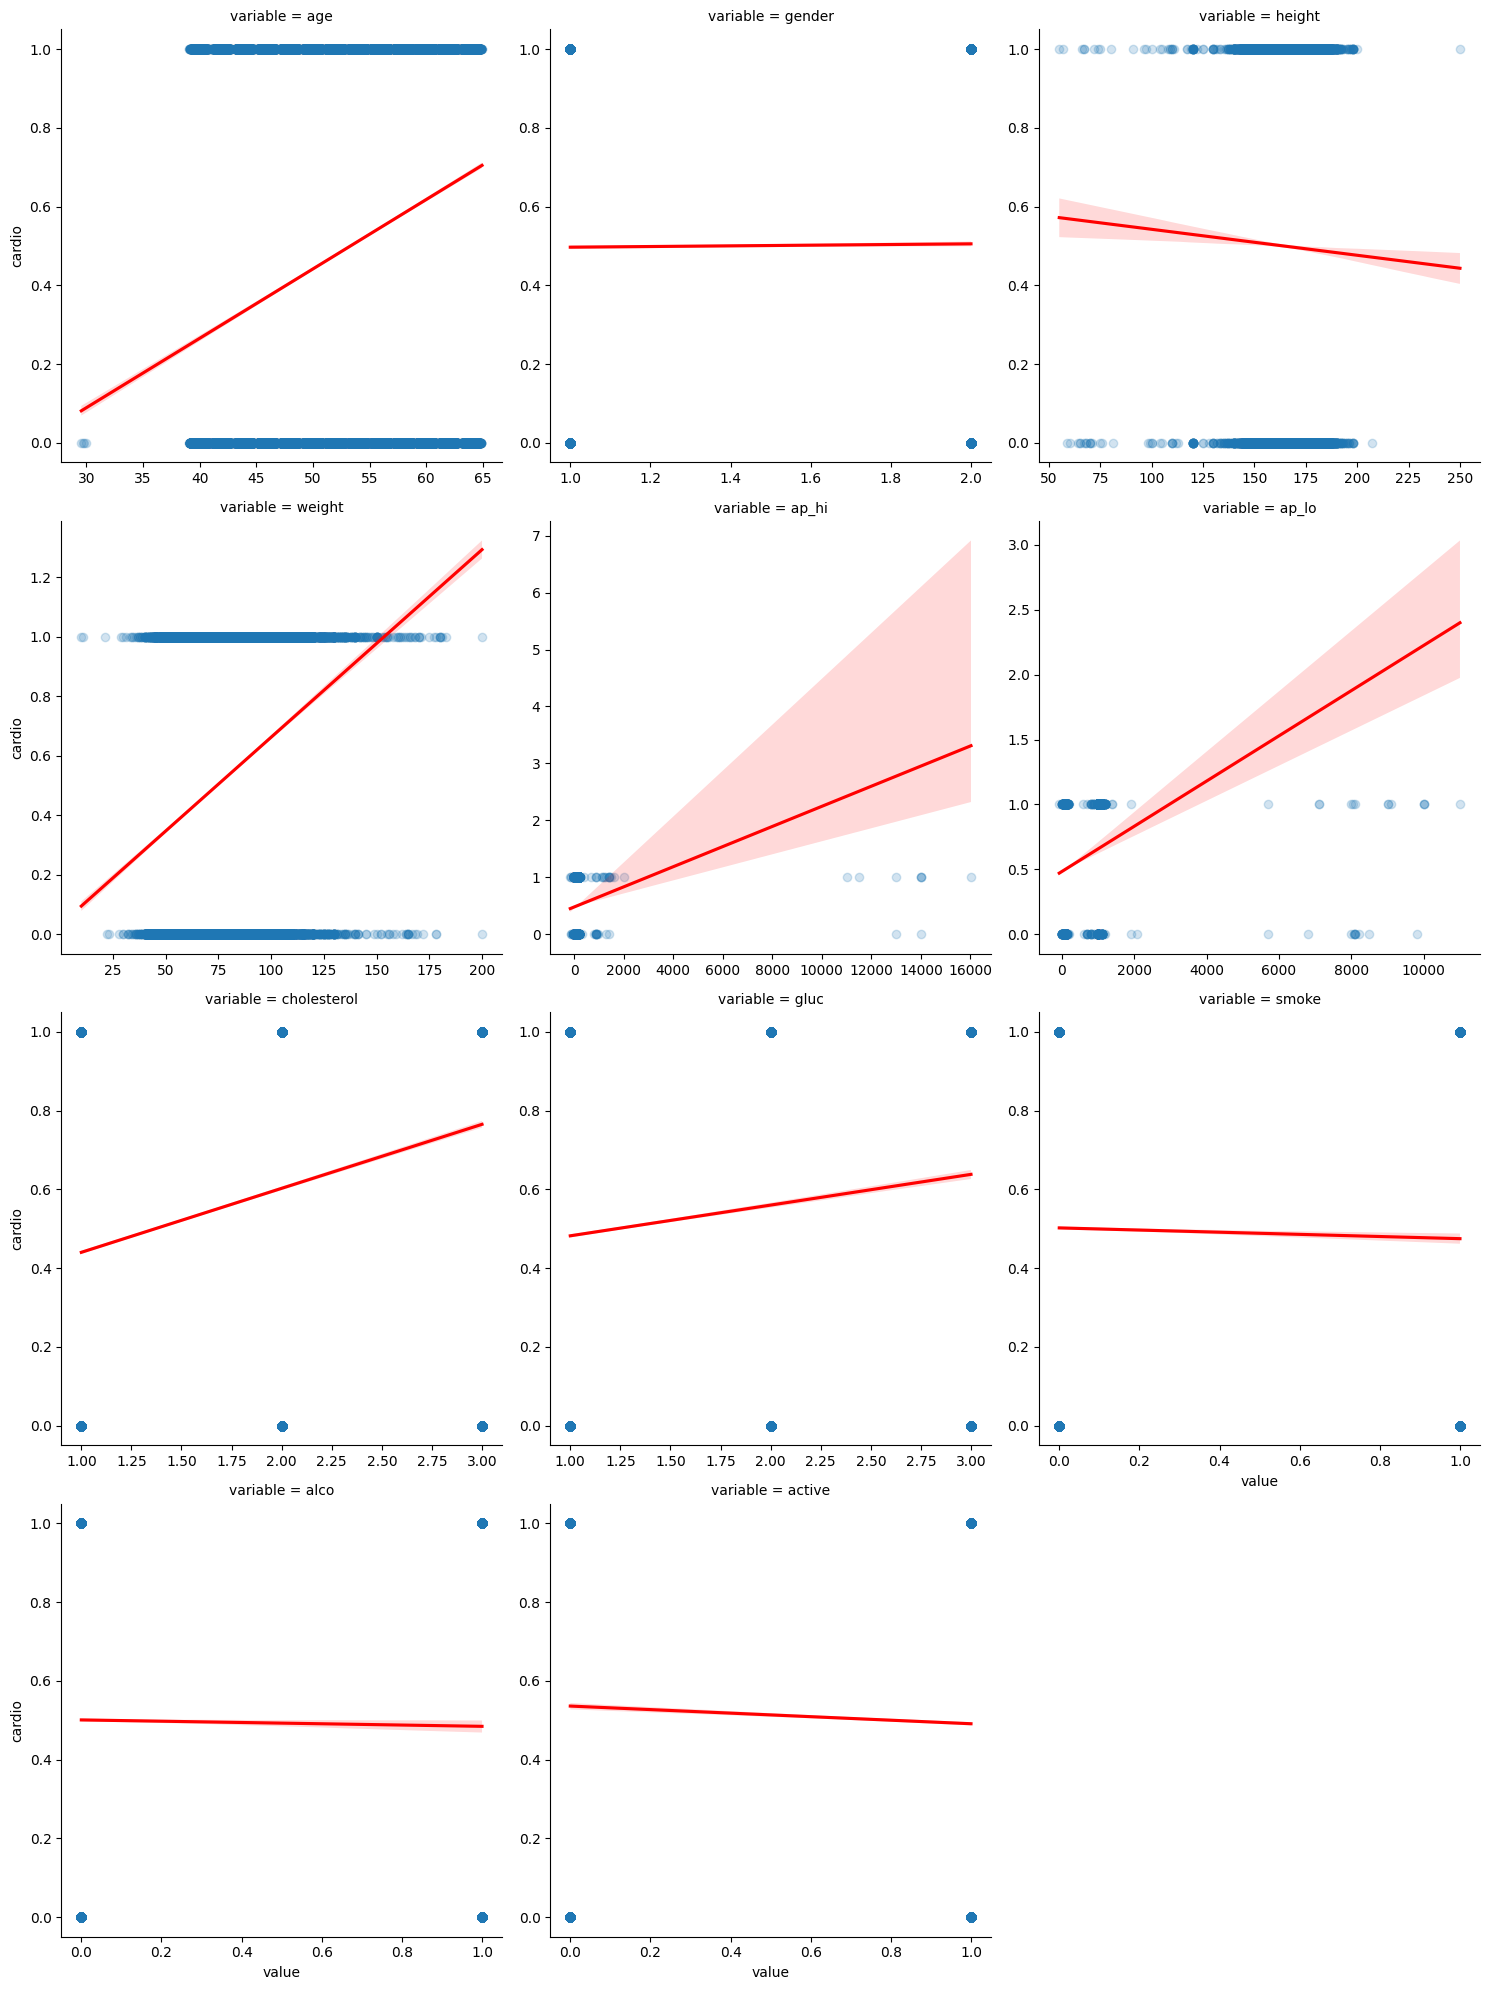

In [4]:
ax = sns.lmplot(
    x="value",
    y="cardio",
    data=df.melt(id_vars="cardio", value_vars=df.columns), # type: ignore
    col="variable",
    col_wrap=3,
    facet_kws={"sharex": False, "sharey": False},
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.2},
)
ax.tight_layout()

Из графиков видно, что риск ССЗ возрастает с увеличением возраста, веса, давления и холестерина.

#### Определение корреляции между признаками

<Axes: >

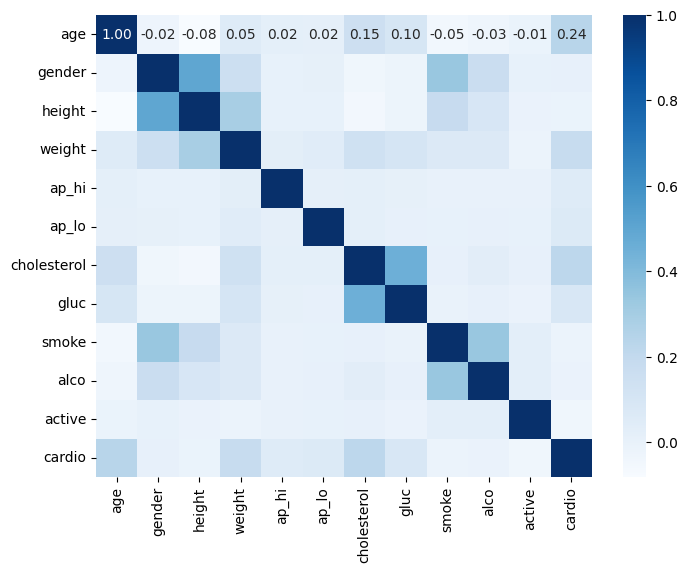

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="Blues",
    fmt=".2f",
)

Существует небольшая прямая корреляция между целевым признаком, возрастом, весом и холестерином.

#### Определение выбросов через расчет межквартильного размаха

In [6]:
def calculate_iqr_boundaries(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [7]:
boundaries_columns = ["ap_hi", "ap_lo", "height", "weight"]
boundaries = pd.DataFrame(calculate_iqr_boundaries(df[boundaries_columns]))
boundaries

ap_hi  ap_lo  height  weight
0   90.0   65.0   142.5    39.5
1  170.0  105.0   186.5   107.5

#### Удаление выбросов из данных

In [8]:
for column in boundaries_columns:
    df.loc[df[column] > boundaries[column][1], column] = boundaries[column][1]
    df.loc[df[column] < boundaries[column][0], column] = boundaries[column][0]
df    

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
id                                                                          
0      50.358668       2   168.0    62.0    110     80            1     1   
1      55.382762       1   156.0    85.0    140     90            3     1   
2      51.629066       1   165.0    64.0    130     70            3     1   
3      48.250465       2   169.0    82.0    150    100            1     1   
4      47.842515       1   156.0    56.0    100     65            1     1   
...          ...     ...     ...     ...    ...    ...          ...   ...   
99993  52.677691       2   168.0    76.0    120     80            1     1   
99995  61.879860       1   158.0   107.5    140     90            2     2   
99996  52.201292       2   183.0   105.0    170     90            3     1   
99998  61.414412       1   163.0    72.0    135     80            1     2   
99999  56.236995       1   170.0    72.0    120     80            2     1   

       smoke  alco  active  cardio  
id                                  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
99993      1     0       1       0  
99995      0     0       1       1  
99996      0     1       0       1  
99998      0     0       0       1  
99999      0     0       1       0  

[70000 rows x 12 columns]

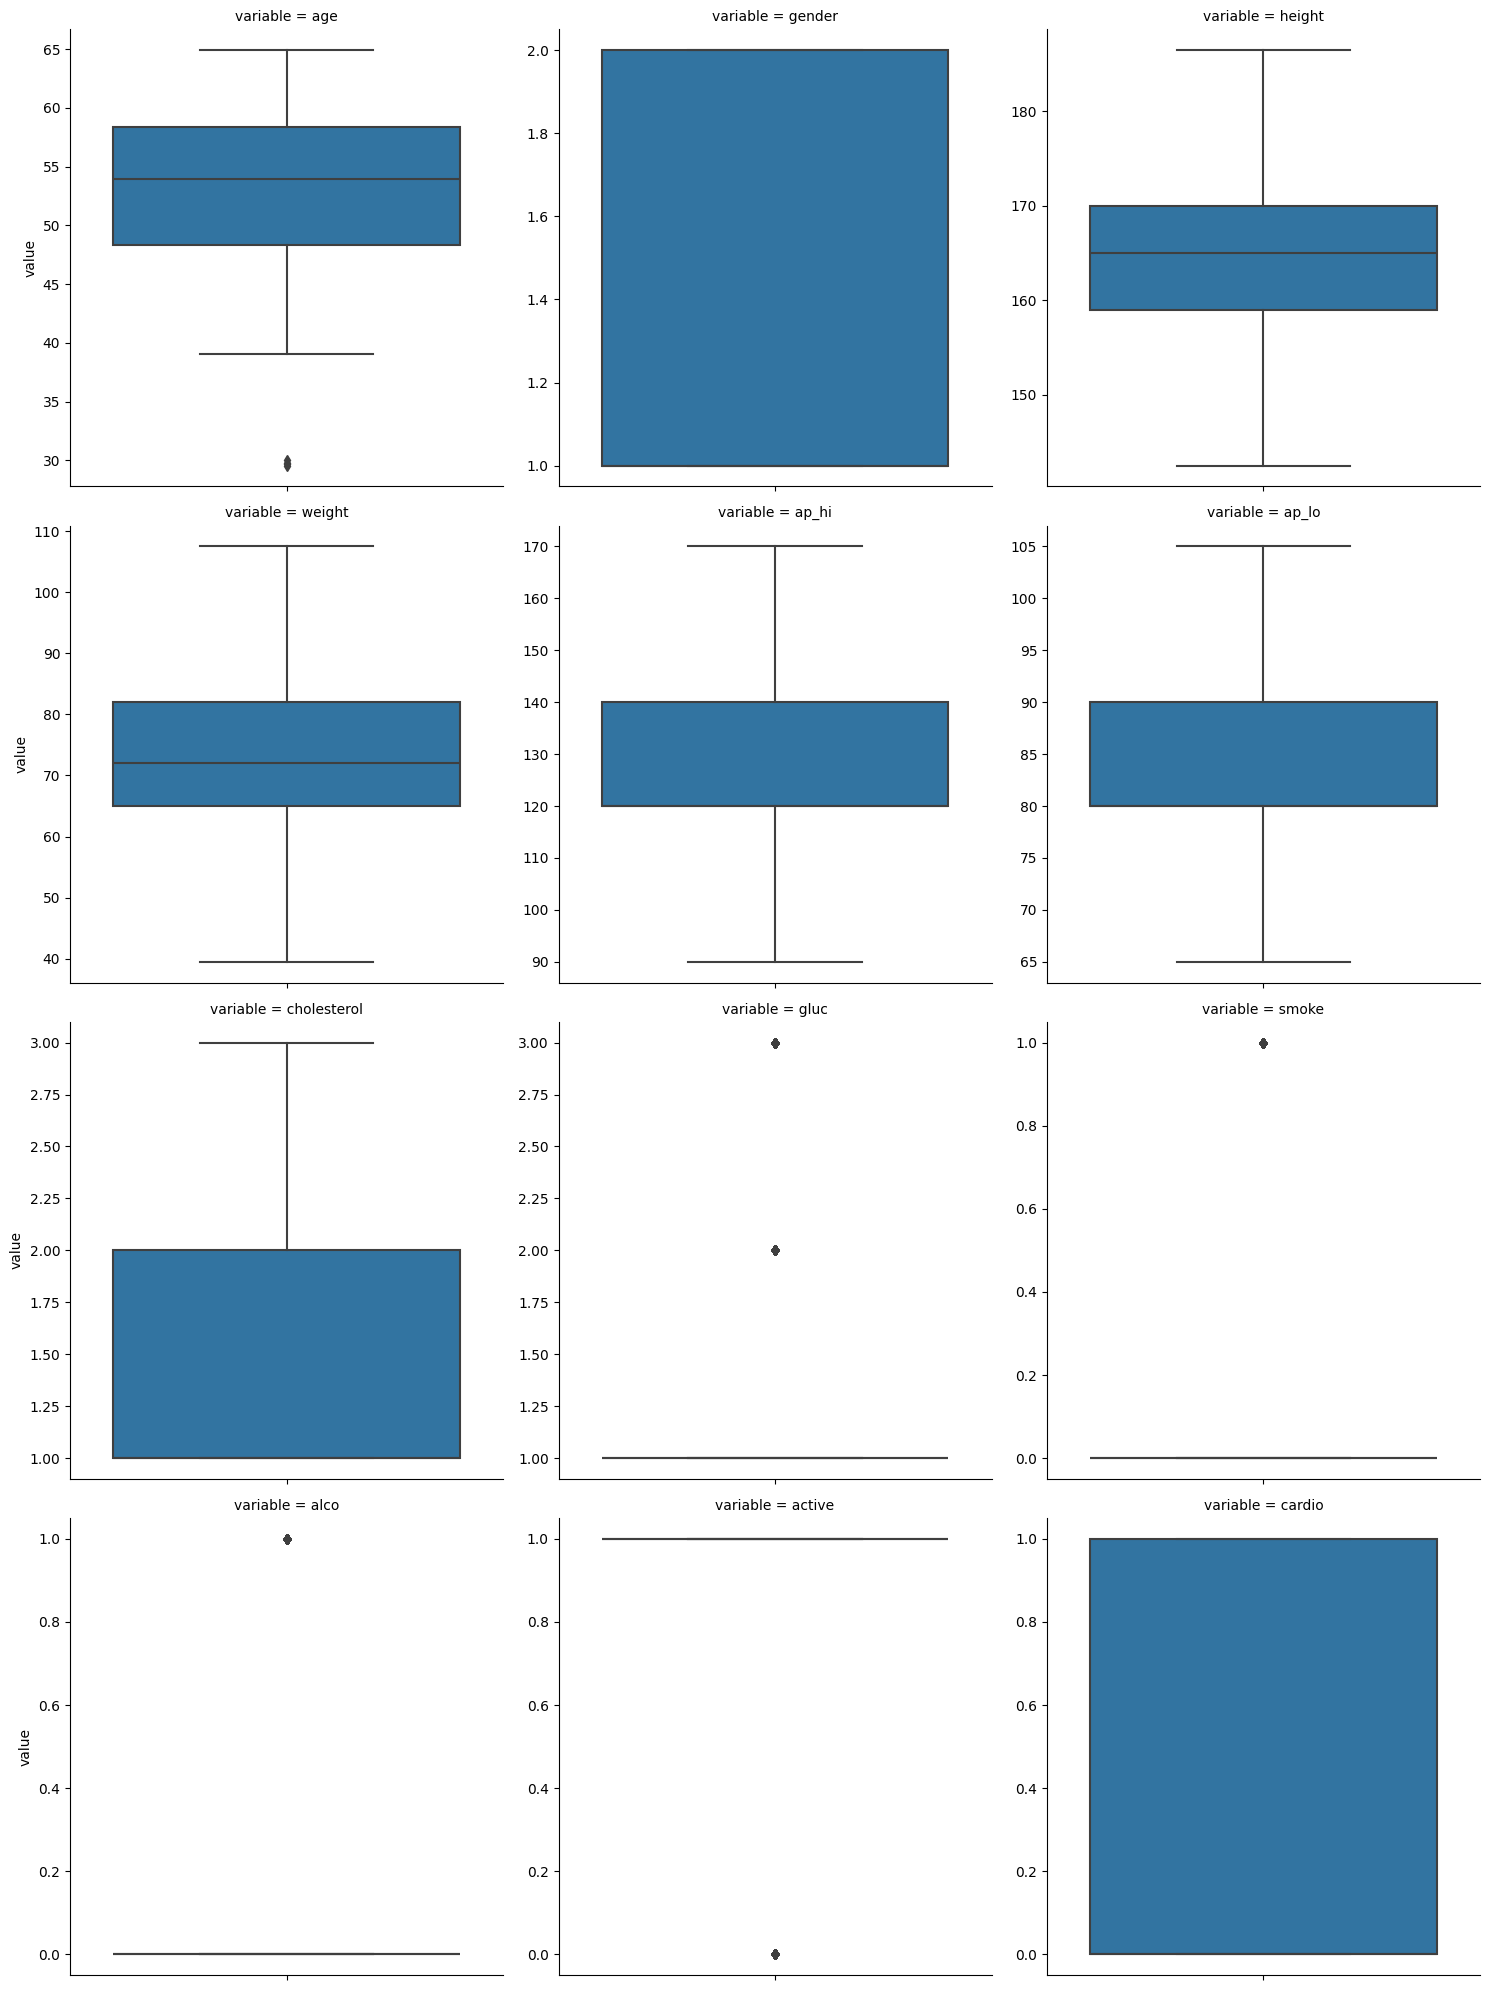

In [9]:
sns.catplot(
    y="value",
    data=df.melt(value_vars=df.columns), # type: ignore
    col="variable",
    kind="box",
    col_wrap=3,
    sharey=False,
)

In [10]:
df.describe().T

count        mean        std         min        25%  \
age          70000.0   53.304309   6.755152   29.564122   48.36272   
gender       70000.0    1.349571   0.476838    1.000000    1.00000   
height       70000.0  164.407179   7.825729  142.500000  159.00000   
weight       70000.0   73.925678  13.442403   39.500000   65.00000   
ap_hi        70000.0  126.712329  16.385978   90.000000  120.00000   
ap_lo        70000.0   81.779500   9.062702   65.000000   80.00000   
cholesterol  70000.0    1.366871   0.680250    1.000000    1.00000   
gluc         70000.0    1.226457   0.572270    1.000000    1.00000   
smoke        70000.0    0.088129   0.283484    0.000000    0.00000   
alco         70000.0    0.053771   0.225568    0.000000    0.00000   
active       70000.0    0.803729   0.397179    0.000000    1.00000   
cardio       70000.0    0.499700   0.500003    0.000000    0.00000   

                    50%         75%         max  
age           53.945351   58.391742   64.924433  
gender         1.000000    2.000000    2.000000  
height       165.000000  170.000000  186.500000  
weight        72.000000   82.000000  107.500000  
ap_hi        120.000000  140.000000  170.000000  
ap_lo         80.000000   90.000000  105.000000  
cholesterol    1.000000    2.000000    3.000000  
gluc           1.000000    1.000000    3.000000  
smoke          0.000000    0.000000    1.000000  
alco           0.000000    0.000000    1.000000  
active         1.000000    1.000000    1.000000  
cardio         0.000000    1.000000    1.000000

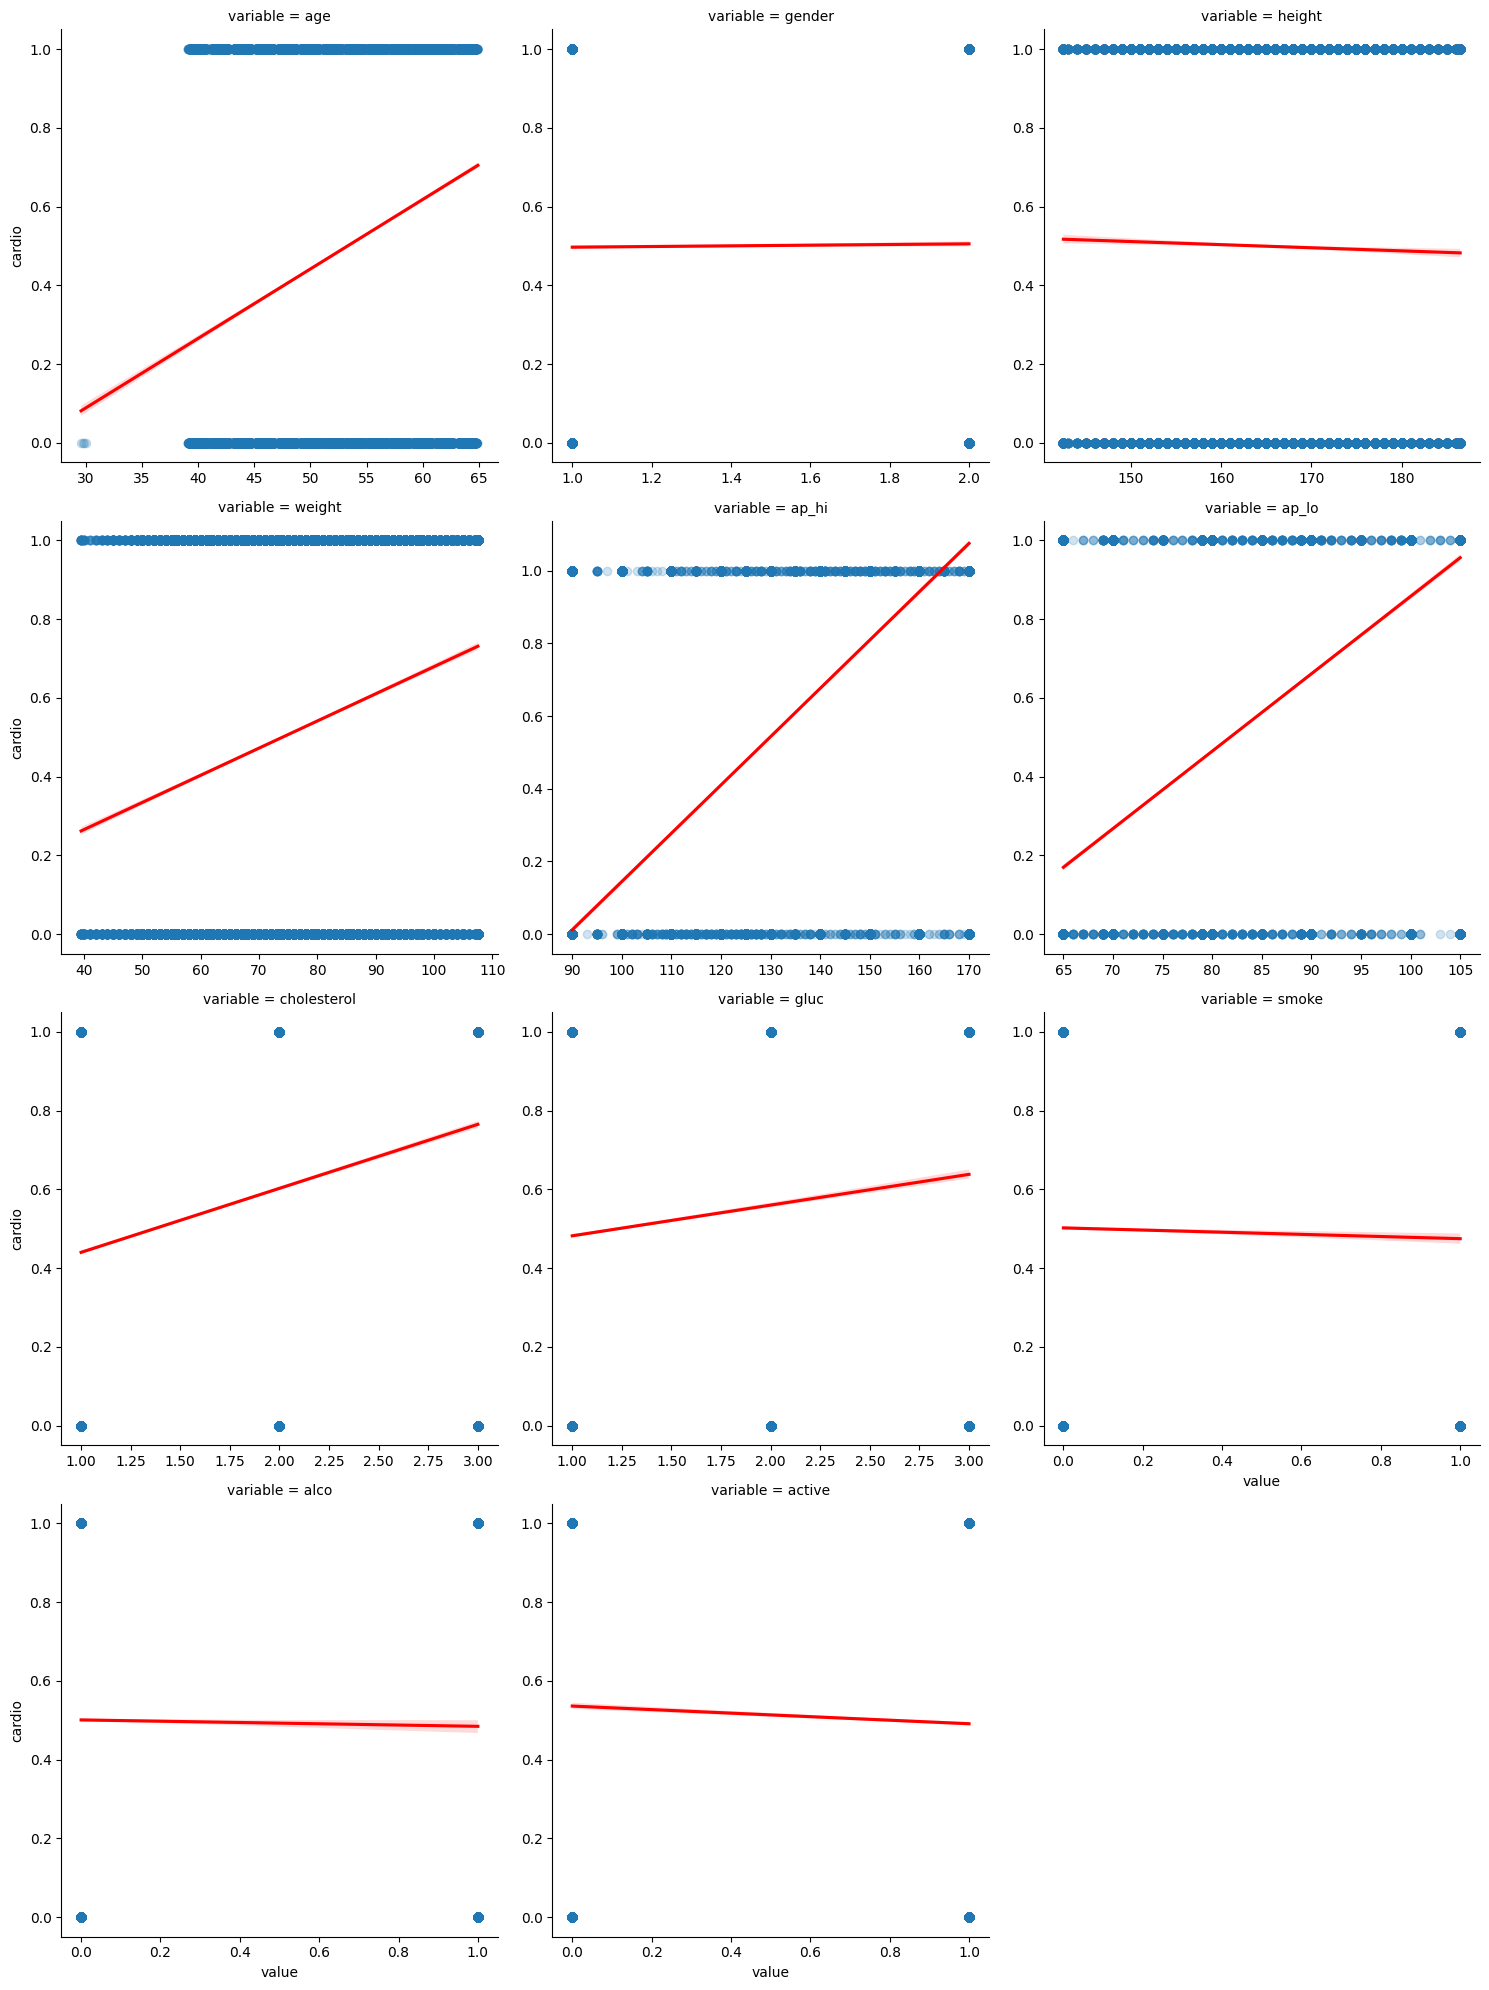

In [11]:
ax = sns.lmplot(
    x="value",
    y="cardio",
    data=df.melt(id_vars="cardio", value_vars=df.columns),  # type: ignore
    col="variable",
    col_wrap=3,
    facet_kws={"sharex": False, "sharey": False},
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.2},
)
ax.tight_layout()

In [12]:
df.to_csv("data/cardio_cleared.csv")